In [8]:
import pandas as pd
data=pd.read_csv('titanic.csv', sep=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data['Age'].mean()

29.69911764705882

In [5]:
data['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [13]:
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Age'].isnull().sum()

0

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data['Cabin'].fillna('G6',inplace=True)
data['Cabin'].isnull().sum()

0

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data['Embarked'].fillna('S',inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Data Visualisation

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


<AxesSubplot:>

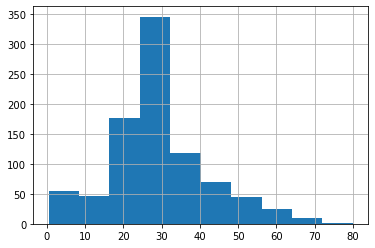

In [23]:
data['Age'].hist()

<AxesSubplot:>

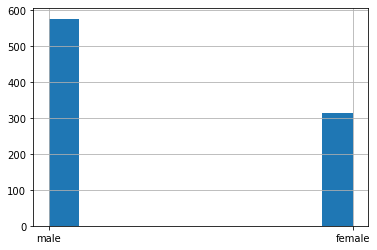

In [21]:
data['Sex'].hist()

<AxesSubplot:>

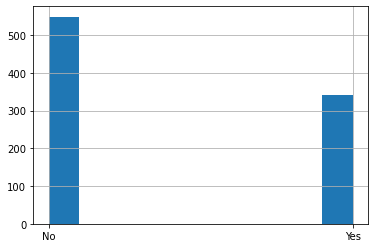

In [24]:
data['Survived'].hist()

<AxesSubplot:title={'center':'Sex Distribution'}, xlabel='Sex', ylabel='Distribution'>

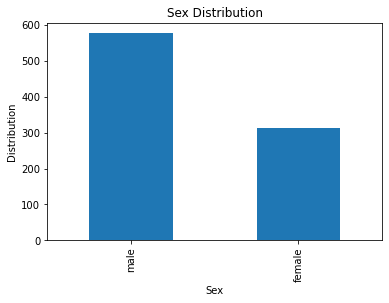

In [33]:
import matplotlib.pyplot as plt
plt.xlabel('Sex')
plt.ylabel('Distribution')
plt.title('Sex Distribution')
dt=data['Sex'].value_counts()
dt.plot.bar()

<AxesSubplot:title={'center':'Survived Distribution'}, xlabel='Survived', ylabel='Distribution'>

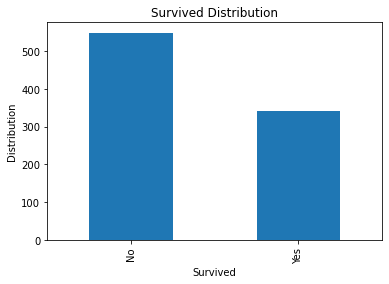

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('Survived')
plt.ylabel('Distribution')
plt.title('Survived Distribution')
dt=data['Survived'].value_counts()
dt.plot.bar()

<AxesSubplot:title={'center':'Class Distribution'}, xlabel='Class', ylabel='Frequency'>

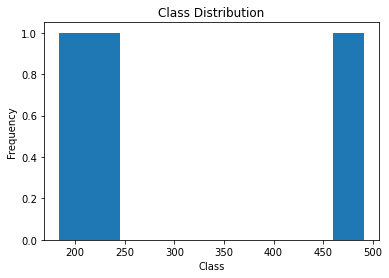

In [35]:
import matplotlib.pyplot as plt
plt.xlabel('Class')
plt.ylabel('Distribution')
plt.title('Class Distribution')
dt=data['Pclass'].value_counts()
dt.plot.hist()

<AxesSubplot:title={'center':'Cabin Distribution'}, xlabel='Cabin', ylabel='Frequency'>

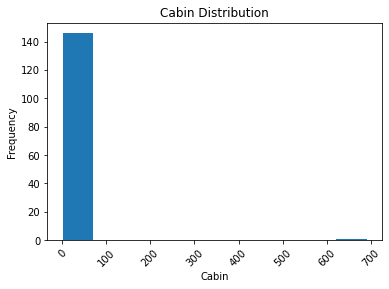

In [37]:
import matplotlib.pyplot as plt
plt.xlabel('Cabin')
plt.ylabel('Distribution')
plt.title('Cabin Distribution')
dt=data['Cabin'].value_counts()
dt.plot.hist()

## Corelation 

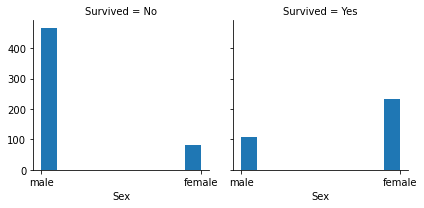

In [46]:
import seaborn as sb
dt=sb.FacetGrid(data,col='Survived')
dt.map(plt.hist,'Sex')

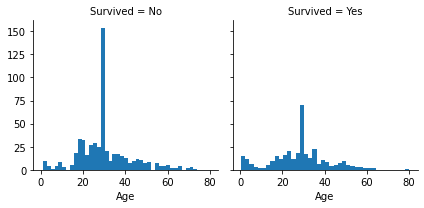

In [49]:
import seaborn as sb
dt=sb.FacetGrid(data,col='Survived')
dt.map(plt.hist,'Age',bins=40)

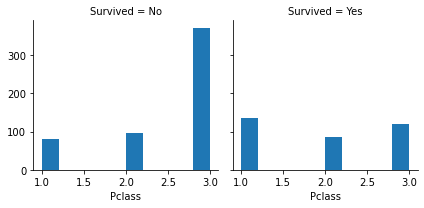

In [51]:
import seaborn as sb
dt=sb.FacetGrid(data,col='Survived')
dt.map(plt.hist,'Pclass')

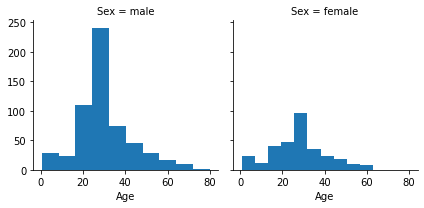

In [52]:
import seaborn as sb
dt=sb.FacetGrid(data,col='Sex')
dt.map(plt.hist,'Age')

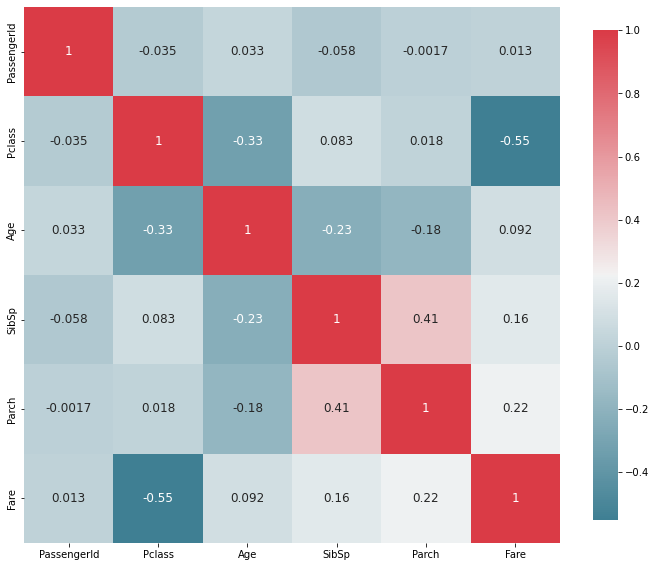

In [55]:
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(data)